<a href="https://colab.research.google.com/github/Kilvia/Keras-multiples-in-out/blob/main/multiple_in_out.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple inputs/outputs (inception structure)

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Concatenate, Flatten, Add, MaxPooling2D, GlobalAveragePooling2D

In [12]:
def ResBlock(x, nodes):
  x1_1_1 = Dense(nodes, activation='relu')(x)
  x1_2_1 = Dense(nodes, activation='relu')(x)
  x1_3_1 = Dense(nodes, activation='relu')(x)

  x1_1_2 = Dense(nodes, activation='relu')(x1_1_1)
  x1_2_2 = Dense(nodes, activation='relu')(x1_2_1)
  x1_3_2 = Dense(nodes, activation='relu')(x1_3_1)

  x = Concatenate(axis=-1)([x1_1_2, x1_2_2, x1_3_2])
  
  return x   

In [13]:
def Multiple():
    inputs = Input(shape=(224, 224, 3))    
    # x = Flatten()(inputs)
    x = Dense(100, activation='relu')(inputs)

    x = ResBlock(x, 100)
    # x = ResBlock(x, 200)
    # x = ResBlock(x, 200)

    x = Flatten()(x)

    outputs = Dense(10, activation='softmax')(x)

    return tf.keras.Model(inputs=inputs, outputs=outputs)

In [14]:
mult = Multiple()

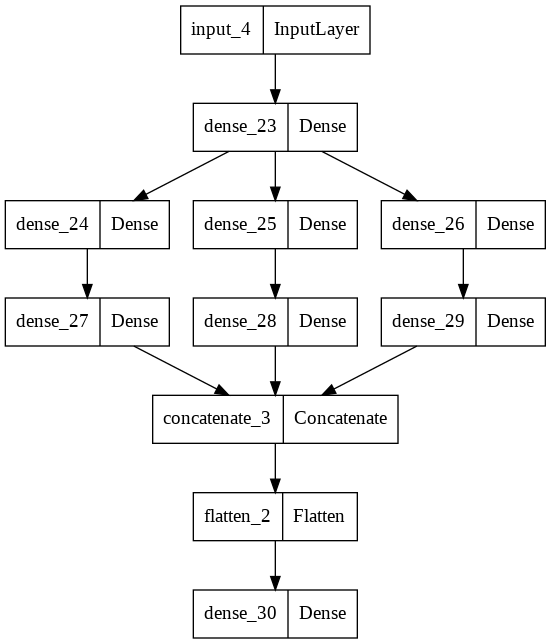

In [15]:
tf.keras.utils.plot_model(mult, to_file='mult.png')